# Titanic

## Objetivos del ejercicio

Durante el ejercicio propuesto debemos de extraer información mediante preguntas sobre de archivo csv facilitado. La idea es ver que información nos proporciona en base a lo que se le pida y como llegar hasta ella, procesarla y presentarla.

In [21]:
import pandas as pd
import numpy as np
import csv 
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go

In [22]:
# Cargamos el csv con los datos
df = pd.read_csv(os.path.join(os.getcwd(), 'titanic.csv'))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df.shape

(891, 12)

In [24]:
# Ahora vamos a pedirle información sobre ella
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
# Vamos a buscar los valores nulos y duplicados y a repararlos
nulos = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
nulos


['Age', 'Cabin', 'Embarked']

In [27]:
df.duplicated().sum()
#Vemos que no hay ninguna fila duplicada

0

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [30]:
# Vemos que la columna Cabin tiene un gran porcentaje NaN por lo que procedemos a eliminarla, puesto que no aporta datos relevantes al sólo tener 204 valores que no son NaN
df = df.drop('Cabin', axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [31]:
# Para la limpieza de la columna Embarked vamos a usar la moda debido a que son solo 2 valores y no es algo representativo dentro de la muestra, además de ser un str.
moda = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(value=moda)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [32]:
#Comprobamos que se ha cambiado bien y no ha sustituido valores que no debía, pero mantenemos los NaN de Age para poder hacer una media de la edad, teniendo en cuenta que esos 177 valores son nulos.
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


## Una vez hemos limpiado nuestro DataFrame de nulos procedemos a realizarle las preguntas y obtener la información sobre él.

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Comenzamos el analisis

## Número de supervivientes del barco

In [34]:
supervivientes= df['Survived'].sum()
supervivientes

342

In [35]:
df['Survived'].mean()*100

38.38383838383838

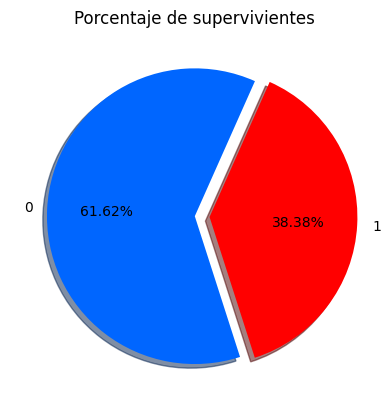

In [36]:
explode = [0, 0.1]
df['Survived'].value_counts().plot.pie(explode=explode, autopct='%1.2f%%', shadow=True, startangle=66, colors=['#0066ff', '#ff0000'])

plt.ylabel('')
plt.title('Porcentaje de supervivientes')
plt.show()

In [37]:
# Como podemos ver, hubo 342 supervivientes de un total de 890 pasajeros y eso nos indica que la tasa de supervivencia fue del 38.38%

## Cantidad de pasajeros por clase y supervivencia

In [38]:
clase= df['Pclass'].value_counts()
clase

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [39]:
clase2 = df['Pclass'].value_counts().sort_index()

fig = go.Figure(go.Bar(x=clase.index, y=clase, text=clase, textposition='auto'))
fig.update_layout(title='Pasajeros por clase en el Titanic', xaxis_title='Clase', yaxis_title='Cantidad de pasajeros')
fig.show()

In [40]:
supervivientes_clase = df.groupby('Pclass')['Survived'].sum()
supervivientes_clase

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [41]:
fig = px.histogram(df, x="Pclass", y="Survived", color="Pclass",
                    labels={"Pclass": "Clase", "Survived": "Supervivientes"}, 
                    title="Supervivientes por clase en el Titanic", template="plotly_dark")
fig.show()

In [42]:
# Los datos nos revelan que la moyoría de los pasajeros viajaban en 3º clase, siendo la 2º la menos ocupada.

## Porcentaje de supervivientes por clase

In [43]:
porcentaje_supervivientes = (supervivientes_clase / clase) *100
porcentaje_supervivientes

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



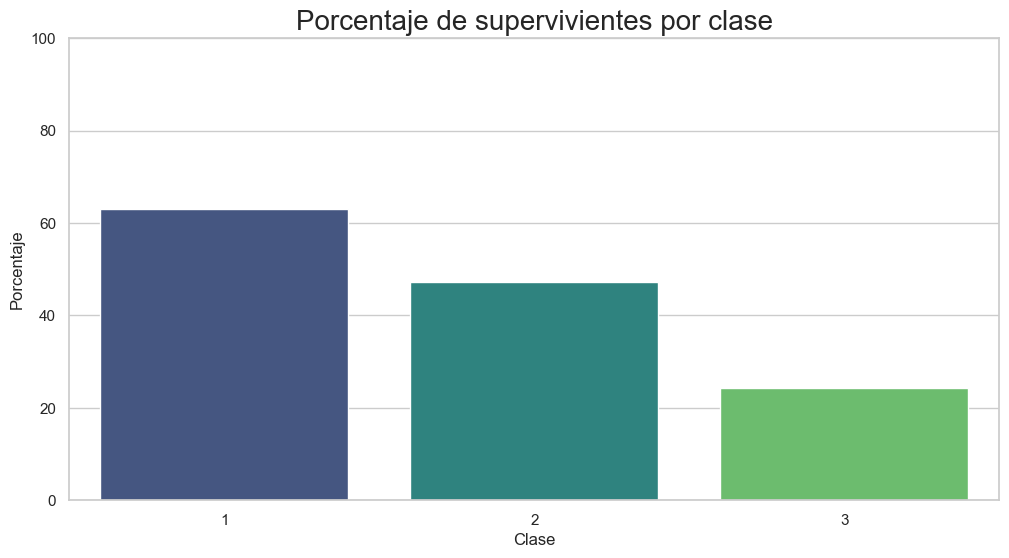

In [44]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x=porcentaje_supervivientes.index, y=porcentaje_supervivientes, palette="viridis")
plt.title('Porcentaje de supervivientes por clase', size=20)
plt.xlabel('Clase')
plt.ylabel('Porcentaje')

# Establecer el rango del eje Y de 0 a 100 al ser un porcentaje
plt.ylim(0, 100)

plt.show();

In [45]:
# Vemos que el porcentaje nos dice que la supervivencia dependió en gran parte por la clase en la que viajaba cada pasajero,
#  siendo la 3º clase la más perjudicada y donde más pasajeros había.

## Sexo que más viajaba en el barco

In [46]:
sex_mas_viajaba= df['Sex'].value_counts()
sex_mas_viajaba

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



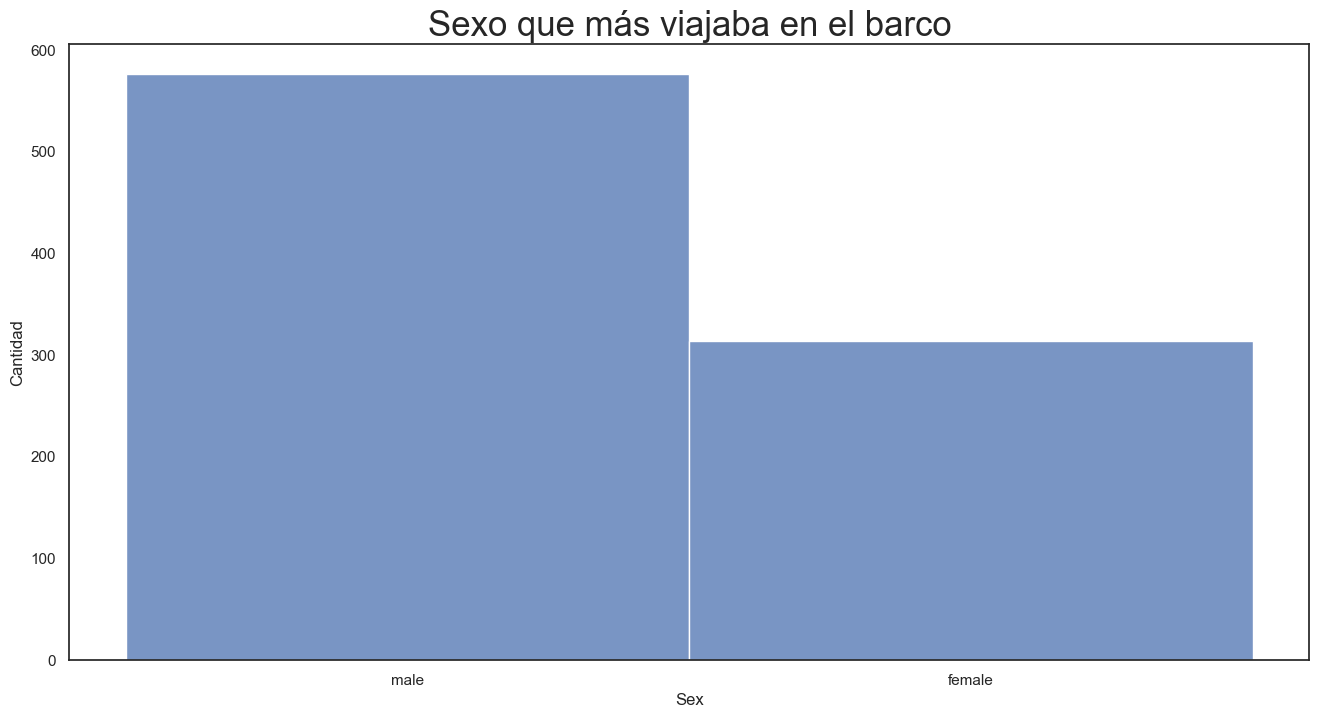

In [47]:
plt.figure(figsize=(16, 8))
sns.set(style="white")
sns.histplot(df['Sex'])
plt.title('Sexo que más viajaba en el barco', size=25)
plt.ylabel('Cantidad');

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

<Axes: xlabel='Survived', ylabel='count'>

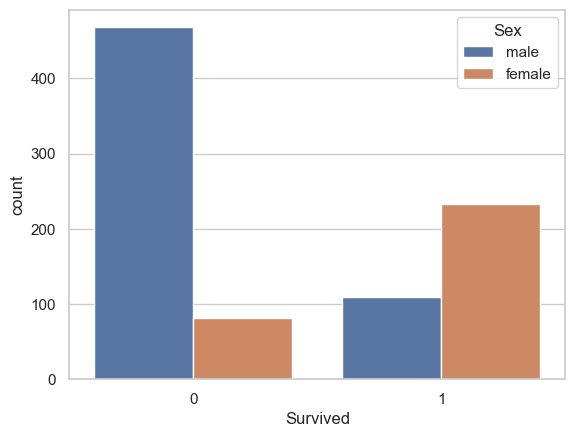

In [97]:
sns.countplot(x='Survived', hue='Sex', data=df)

In [48]:
# Vemos que los resultados arrojan que el sexo que más viajaba en el barco es el masculino y por lo tanto,
# el mayor número de fallecidos también, "Salvense primero las mujeres y los niños".

## Edad media del barco

In [49]:
edad_media = df['Age'].mean()
edad_media

29.69911764705882

In [50]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

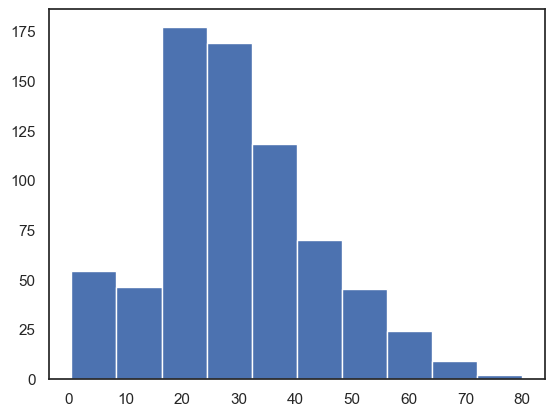

In [51]:
plt.hist(df['Age']);

In [52]:
# La edad media, siendo conscientes de los valores nulos, nos arroja que es una edad media bastante baja.
# Se hace de esta manera, y no poniendo los NaN a 0, porque sino se podría distorsionar los resultados al contabilizar esas posiciones. 
# Ejemplo: 1,2,3,4,0 haría la media entre 5 valores, mientras que si lo dejamos 1,2,NaN,4,6 lo haría sobre 4
# También podemos ver que la mínima era de 0 y la máxima de 80

## Tarifa media del billete

In [53]:
tarifa= df['Fare'].mean()
tarifa

32.204207968574636

In [54]:
df['Fare'].max()

512.3292

In [55]:
# Vemos que la tarifa media del billete fueron algo más de 32$

## Número de embarques por cada puerto

In [56]:
# Vamos a analizar cual fue el puerto con mayor núermo de embarques

num_embarques= df['Embarked'].value_counts()
num_embarques

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\newmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



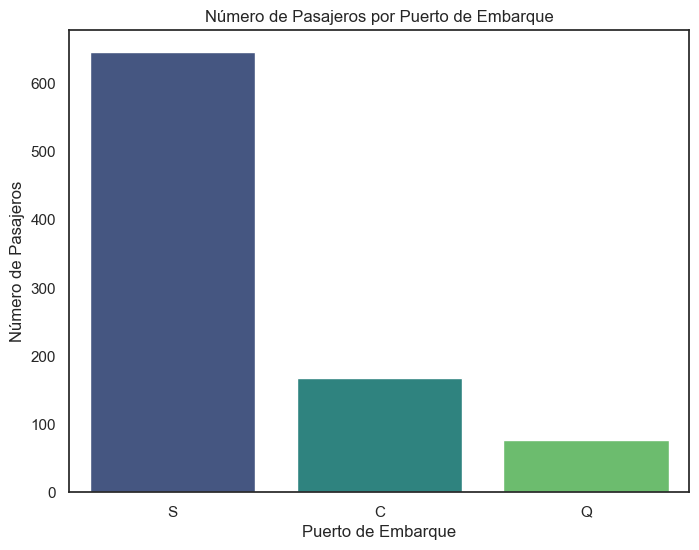

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Embarked', palette='viridis')
plt.title('Número de Pasajeros por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros');

In [58]:
# A continuación tenemos una gráfica donde podemos ver donde embarcaron las diferentes clases

## Valores igual a 0 en la columna Fare y su relación

In [59]:
valores_igual_0 = df.query('Fare == 0')
valores_igual_0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S


In [60]:
# En esta tabla podemos ver que los valores que se corresponden a 0 en la columna Fare, están relacionados con el sexo y el puerto de embarque.